In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf

In [2]:
print("Tensorflow version: " + str(tf.__version__))

Tensorflow version: 2.1.0


In [3]:
print("GPU: " + str(tf.config.list_physical_devices('GPU')))

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


<h3> Dataset </h3>

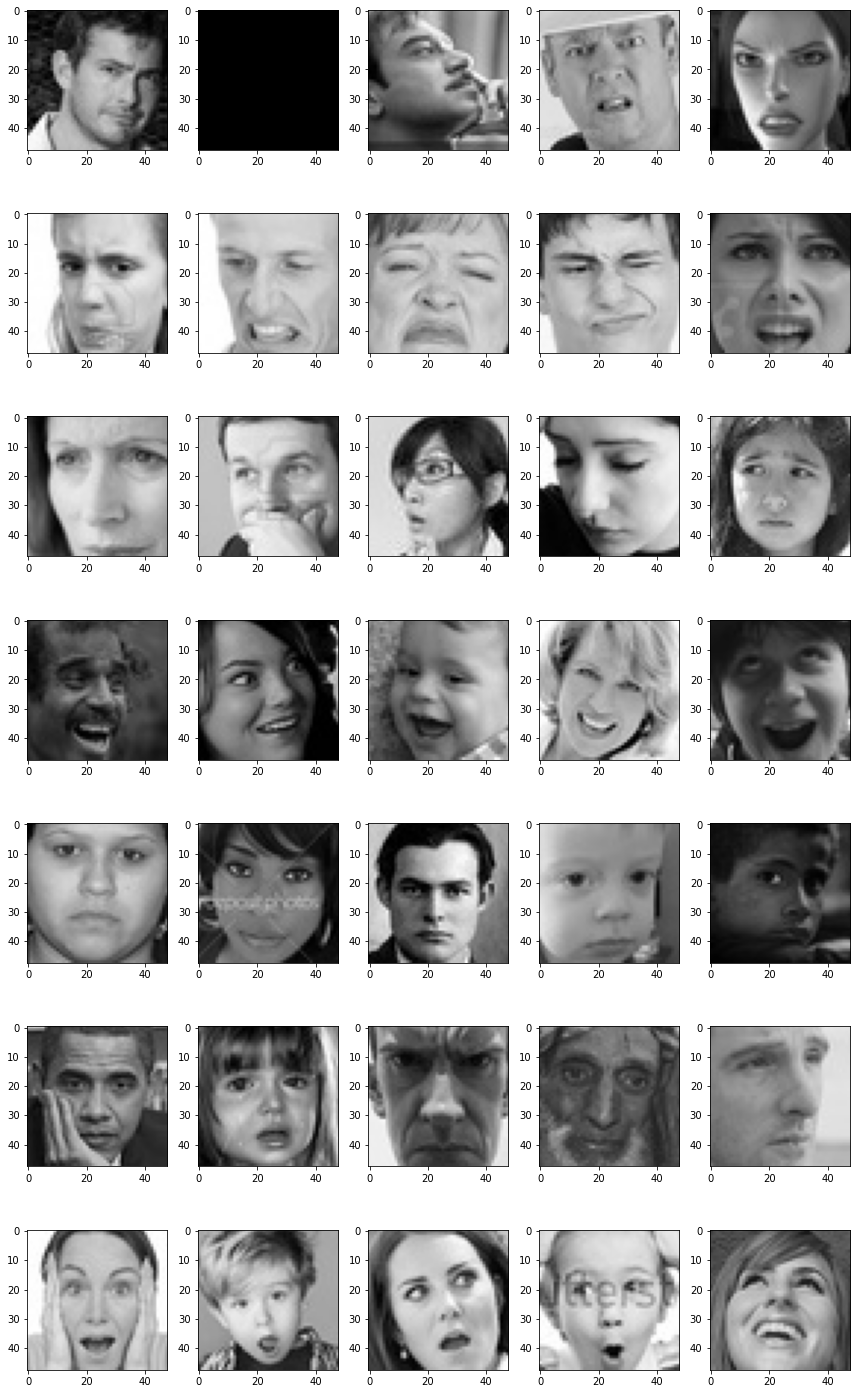

In [4]:
utils.datasets.fer.plot_example_images(plt).show()

In [5]:
for expression in os.listdir("train/"):
    print(str(len(os.listdir("train/" + expression))) + " " + expression + " images")

3995 angry images
436 disgust images
4097 fear images
7214 happy images
4965 neutral images
4830 sad images
3171 surprise images


<h3> Generate Training and Validation Batches </h3>

In [6]:
img_size = 48
batch_size = 128

datagen_train = ImageDataGenerator(horizontal_flip=True)

train_generator = datagen_train.flow_from_directory("train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("test/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28708 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


<h3>Convolutional Neural Network </h3>

In [7]:
# Initialising the CNN
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolutional layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolutional layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolutional layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# 1st Fully connected layer 
model.add(Dense(256, kernel_regularizer = tf.keras.regularizers.l2(0.0000001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# 2nd Fully connected layer
model.add(Dense(512, kernel_regularizer = tf.keras.regularizers.l2(0.0000001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(lr=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

<h3> Training Model </h3>

In [8]:
%%time

epochs = 35
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [checkpoint, reduce_lr]

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks = callbacks
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 224 steps, validate for 56 steps
Epoch 1/35
223/224 [============================>.] - ETA: 0s - loss: 1.8814 - accuracy: 0.2663
Epoch 00001: saving model to model_weights.h5
224/224 [==============================] - 39s 175ms/step - loss: 1.8806 - accuracy: 0.2666 - val_loss: 1.8179 - val_accuracy: 0.2868
Epoch 2/35
223/224 [============================>.] - ETA: 0s - loss: 1.5431 - accuracy: 0.4022
Epoch 00002: saving model to model_weights.h5
224/224 [==============================] - 31s 139ms/step - loss: 1.5431 - accuracy: 0.4023 - val_loss: 1.6924 - val_accuracy: 0.3292
Epoch 3/35
223/224 [============================>.] - ETA: 0s - loss: 1.3428 - accuracy: 0.4813
Epoch 00003: saving model to model_weights.h5
224/224 [==============================] - 31s 140ms/step - loss: 1.3431 - accuracy: 0.4814 - val_loss: 1.4763 - val_accuracy: 0.4226
Epoch 4/35
223/224 [============================>.] - ETA: 0s - loss: 1.2457 - 

Epoch 30/35
223/224 [============================>.] - ETA: 0s - loss: 0.8541 - accuracy: 0.6801
Epoch 00030: saving model to model_weights.h5
224/224 [==============================] - 34s 151ms/step - loss: 0.8537 - accuracy: 0.6805 - val_loss: 0.9776 - val_accuracy: 0.6465
Epoch 31/35
223/224 [============================>.] - ETA: 0s - loss: 0.8523 - accuracy: 0.6807
Epoch 00031: saving model to model_weights.h5
224/224 [==============================] - 34s 151ms/step - loss: 0.8521 - accuracy: 0.6809 - val_loss: 0.9760 - val_accuracy: 0.6452
Epoch 32/35
223/224 [============================>.] - ETA: 0s - loss: 0.8548 - accuracy: 0.6782
Epoch 00032: saving model to model_weights.h5
224/224 [==============================] - 34s 152ms/step - loss: 0.8549 - accuracy: 0.6781 - val_loss: 0.9762 - val_accuracy: 0.6469
Epoch 33/35
223/224 [============================>.] - ETA: 0s - loss: 0.8514 - accuracy: 0.6816
Epoch 00033: saving model to model_weights.h5
224/224 [=================

<h3> Evaluating Model </h3>

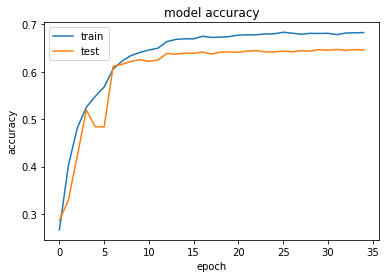

In [9]:
#Graph of accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

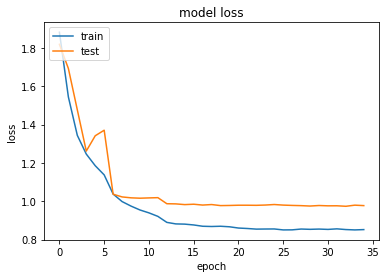

In [10]:
#Graph of loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h3> Represent Model as JSON String </h3>

In [11]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)